In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFilter

In [5]:
def gaussian_pyramid_naive(image_path, levels):
    image = Image.open(image_path).convert('RGB')
    image_np = np.array(image)
    pyramids_list = [image_np]
    current_image_np = image_np.copy() 
    for i in range(levels):
        #current_image_np = cv2.GaussianBlur(current_image_np, (5, 5), 0)  # Apply Gaussian blur
        current_image_np = current_image_np[::2, ::2]  # Downsample by taking every second pixel
        pyramids_list.append(current_image_np)
    
    for i, img in enumerate(pyramids_list):
        plt.imshow(np.array(img))
        plt.title(f'Level {i}')
        plt.axis('off')
        plt.show()
        
    

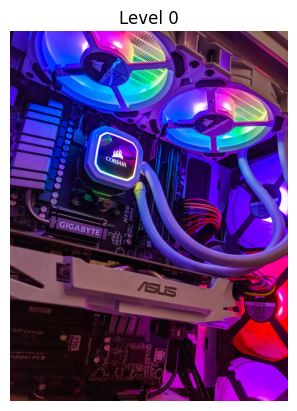

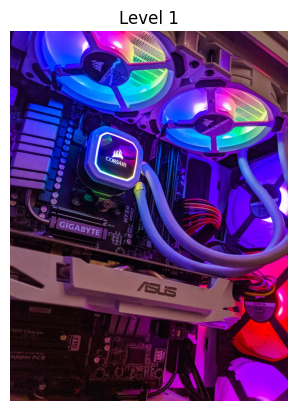

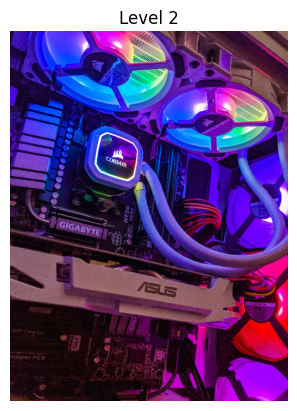

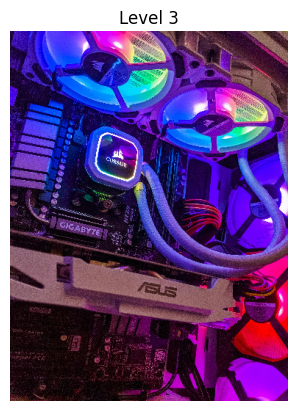

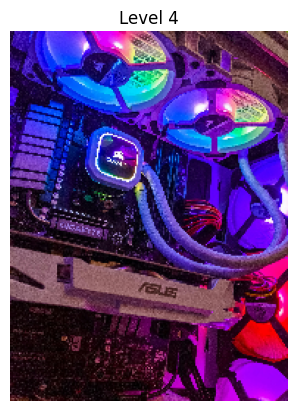

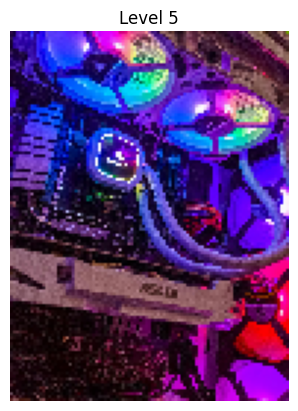

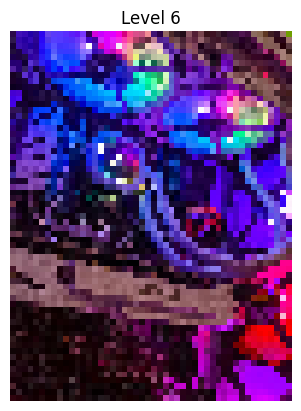

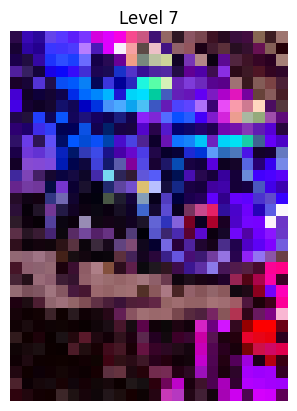

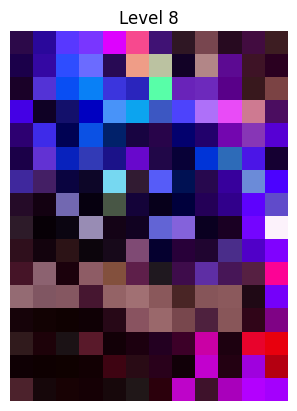

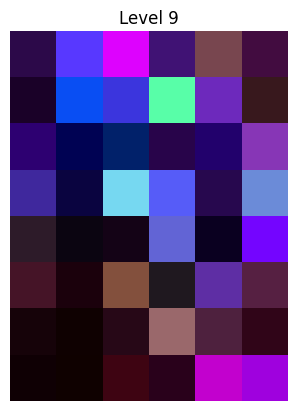

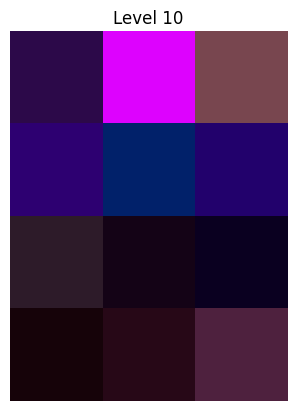

In [6]:
gaussian_pyramid_naive('Assets/computer.jpg', 10)

In [7]:
def gaussian_pyramid_blurring(image_path, levels):
    image = Image.open(image_path).convert('RGB')
    image_np = np.array(image)
    pyramids_list = [image_np]
    current_image_np = image_np.copy() 
    for i in range(levels):
        sigma = max(1.0, min(image_np.shape[0], image_np.shape[1]) / 30)
        cv2.GaussianBlur(image_np, (3, 3), sigmaX=sigma)
        current_image_np = current_image_np[::2, ::2]  # Downsample by taking every second pixel
        pyramids_list.append(current_image_np)
    
    for i, img in enumerate(pyramids_list):
        plt.imshow(np.array(img))
        plt.title(f'Level {i}')
        plt.axis('off')
        plt.show()

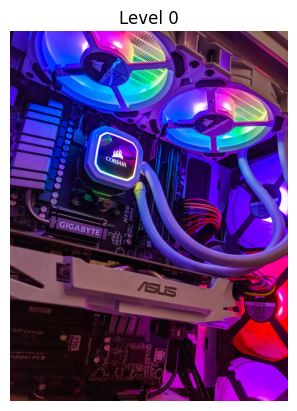

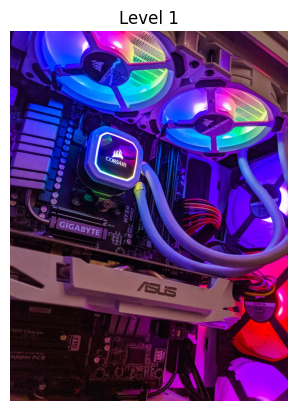

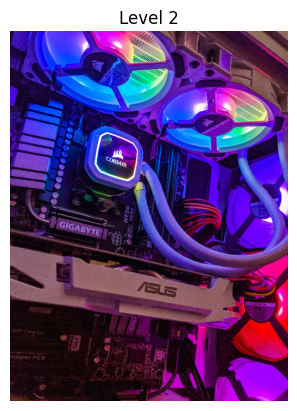

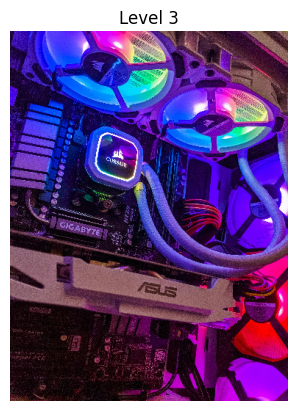

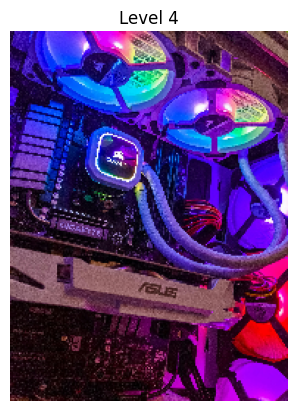

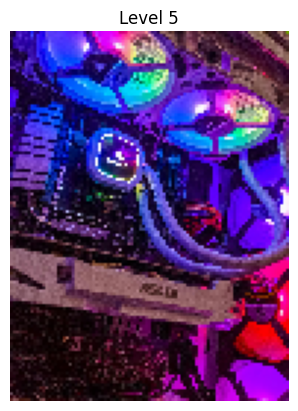

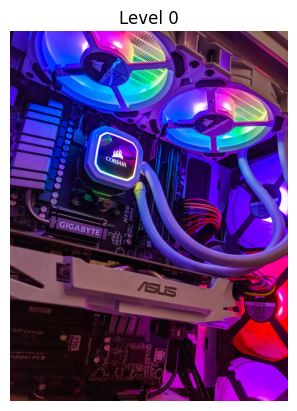

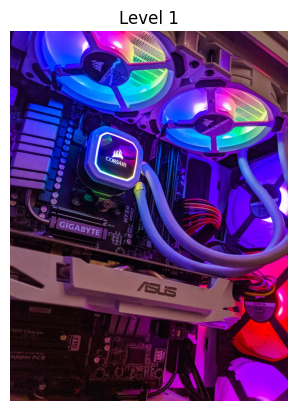

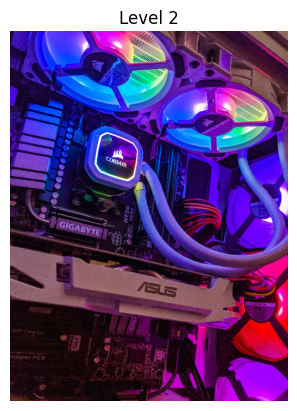

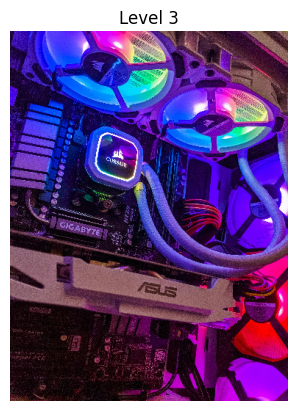

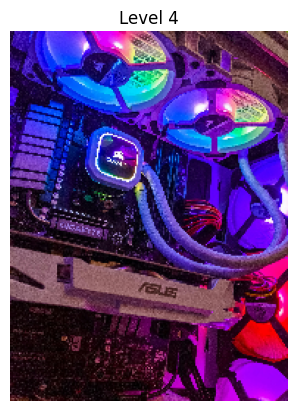

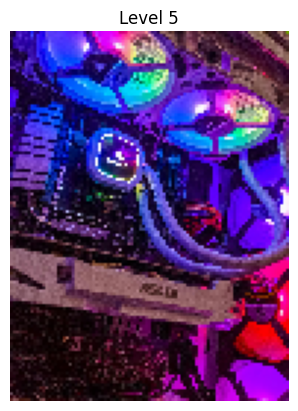

In [8]:
gaussian_pyramid_blurring('Assets/computer.jpg', 5)
gaussian_pyramid_naive('Assets/computer.jpg', 5)        

In [25]:
def forward_warping(file_path: str, transform):
    """
    Applies forward warping to an image using a specified transformation function.
    for each pixel in the original image, it computes the new pixel position and puts the pixel value there.
    """
    image = Image.open(file_path).convert("RGB")
    image = image.resize((512, 512))  # Resize for better visualization
    w, h = image.size
    warp_image = Image.new("RGB", (w, h), (0, 0, 0))  # default black

    for i in range(h):  # rows
        for j in range(w):  # cols
            x, y = transform(j, i)  # feed (x, y) = (col, row)
            x, y = int(x), int(y)
            if 0 <= x < w and 0 <= y < h:
                warp_image.putpixel((x, y), image.getpixel((j, i)))

    plt.imshow(np.array(warp_image))
    plt.axis('off')
    plt.show()


In [31]:
def rotate_transform(angle, center_x, center_y):
    """
    Returns a transformation function that rotates points around a specified center.
    The angle is in degrees.
    """
    angle_rad = np.deg2rad(angle)
    cos_a = np.cos(angle_rad)
    sin_a = np.sin(angle_rad)
    
    def transform(x, y):
        """
        takes (x, y) coordinates and returns the new coordinates after rotation.
        """
        x_shifted = x - center_x
        y_shifted = y - center_y

        # Rotate
        new_x = x_shifted * cos_a - y_shifted * sin_a
        new_y = x_shifted * sin_a + y_shifted * cos_a

        # Shift back
        new_x += center_x
        new_y += center_y

        return new_x, new_y
    
    return transform


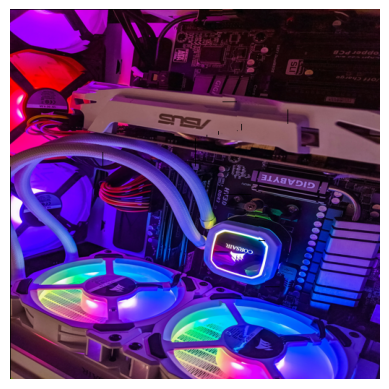

In [30]:
forward_warping('Assets/computer.jpg', rotate_transform(540 , 256, 256))